## 步骤：
1.确定需求和目的：分析相关问题、预测某地点空气质量<br>
2.获取数据；<br>
3.数据清洗：处理缺失值、异常值、重复值；<br>
4.针对需求展开分析问题：a.哪些城市空气质量较好/较差；b.按空气质量等级划分统计；c.分析空气质量高低受何种因素影响；d.判断全国城市空气质量指数均值为70是否准确；e.沿海城市空气质量是否好于内陆城市；<br>
5.数据预测<br>

In [1]:
#初始化及导入模块
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
matplotlib.rcParams['font.sans-serif'] = ['SimHei'] 
matplotlib.rcParams['font.family']='sans-serif'
matplotlib.rcParams['axes.unicode_minus'] = False
%matplotlib inline

导入并查看数据

In [2]:
df_data = pd.read_csv(r'C:\Users\Administrator\Desktop\data.csv')
print(df_data.info())
df_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 12 columns):
City                       325 non-null object
AQI                        325 non-null int64
Precipitation              321 non-null float64
GDP                        325 non-null float64
Temperature                325 non-null float64
Longitude                  325 non-null float64
Latitude                   325 non-null float64
Altitude                   325 non-null float64
PopulationDensity          325 non-null int64
Coastal                    325 non-null int64
GreenCoverageRate          325 non-null float64
Incineration(10,000ton)    325 non-null float64
dtypes: float64(8), int64(3), object(1)
memory usage: 30.5+ KB
None


,City,AQI,Precipitation,GDP,Temperature,Longitude,Latitude,Altitude,PopulationDensity,Coastal,GreenCoverageRate,"Incineration(10,000ton)"
0,Ngawa Prefecture,23,665.1,271.13,8.200000,102.224650,31.899410,2617.0,11,0,36.00,23.00
1,Aksu City,137,80.4,610.00,12.276712,80.263380,41.167540,1108.0,6547,0,33.94,23.00
2,Alxa League,85,150.0,322.58,24.200000,105.728950,38.851920,1673.0,1,0,36.00,23.00
3,Ngari,28,74.2,37.40,1.000000,80.105800,32.501110,4280.0,1,0,36.00,23.00
4,Anqin City,79,2127.8,1613.20,17.291781,117.034431,30.512646,13.0,2271,0,45.80,27.48


In [3]:
#为了可读性把字段名更改为中文
columns_name = {'City':'城市','AQI':'空气质量指数','Precipitation':'降雨量',
                'GDP':'生产总值','Temperature':'温度','Longitude':'经度',
               'Latitude':'纬度','Altitude':'海拔','PopulationDensity':'人口密度',
               'Coastal':'是否沿海','GreenCoverageRate':'绿化覆盖率','Incineration(10,000ton)':'焚烧量'}
df_data.rename(columns_name,axis=1,inplace=True)
print(df_data.info())
df_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 12 columns):
城市        325 non-null object
空气质量指数    325 non-null int64
降雨量       321 non-null float64
生产总值      325 non-null float64
温度        325 non-null float64
经度        325 non-null float64
纬度        325 non-null float64
海拔        325 non-null float64
人口密度      325 non-null int64
是否沿海      325 non-null int64
绿化覆盖率     325 non-null float64
焚烧量       325 non-null float64
dtypes: float64(8), int64(3), object(1)
memory usage: 30.5+ KB
None


,城市,空气质量指数,降雨量,生产总值,温度,经度,纬度,海拔,人口密度,是否沿海,绿化覆盖率,焚烧量
0,Ngawa Prefecture,23,665.1,271.13,8.200000,102.224650,31.899410,2617.0,11,0,36.00,23.00
1,Aksu City,137,80.4,610.00,12.276712,80.263380,41.167540,1108.0,6547,0,33.94,23.00
2,Alxa League,85,150.0,322.58,24.200000,105.728950,38.851920,1673.0,1,0,36.00,23.00
3,Ngari,28,74.2,37.40,1.000000,80.105800,32.501110,4280.0,1,0,36.00,23.00
4,Anqin City,79,2127.8,1613.20,17.291781,117.034431,30.512646,13.0,2271,0,45.80,27.48


数据清洗

In [4]:
#处理缺失值，因为每一行是一条城市数据，所以这里不对空值删除，而用均值填充
df_data['降雨量'].fillna(df_data['降雨量'].mean(),inplace=True)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 12 columns):
城市        325 non-null object
空气质量指数    325 non-null int64
降雨量       325 non-null float64
生产总值      325 non-null float64
温度        325 non-null float64
经度        325 non-null float64
纬度        325 non-null float64
海拔        325 non-null float64
人口密度      325 non-null int64
是否沿海      325 non-null int64
绿化覆盖率     325 non-null float64
焚烧量       325 non-null float64
dtypes: float64(8), int64(3), object(1)
memory usage: 30.5+ KB


In [5]:
#处理重复值：城市
print(df_data['城市'][df_data['城市'].duplicated()])
df_data.drop(df_data['城市'][df_data['城市'].duplicated()].index,inplace=True)
df_data.info()

109    Baoding City
218      Luohe City
227    Taizhou City
Name: 城市, dtype: object
<class 'pandas.core.frame.DataFrame'>
Int64Index: 322 entries, 0 to 324
Data columns (total 12 columns):
城市        322 non-null object
空气质量指数    322 non-null int64
降雨量       322 non-null float64
生产总值      322 non-null float64
温度        322 non-null float64
经度        322 non-null float64
纬度        322 non-null float64
海拔        322 non-null float64
人口密度      322 non-null int64
是否沿海      322 non-null int64
绿化覆盖率     322 non-null float64
焚烧量       322 non-null float64
dtypes: float64(8), int64(3), object(1)
memory usage: 32.7+ KB


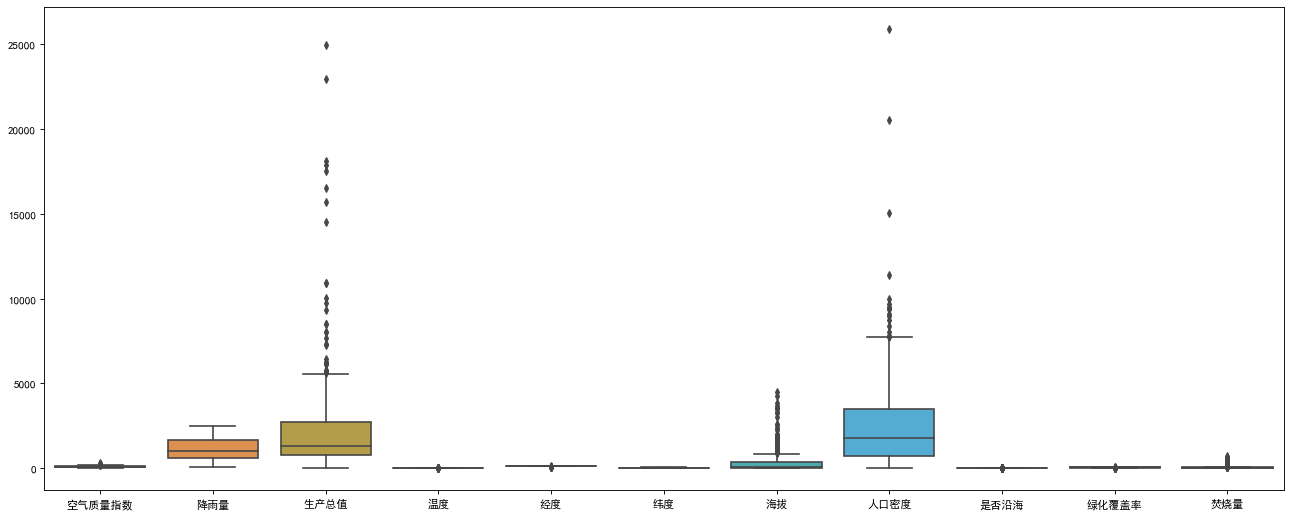

In [191]:
#处理异常值
plt.figure(figsize=(20,8),dpi=80)
sns.boxplot(data=df_data)
plt.show()

In [190]:
#找出箱体大小，计算出上限和下限，把离群点用上限下限替换，这里不做异常值处理
# for columns in df_data.columns:
#     if np.issubdtype(df_data[columns].dtype, np.number):
#         info = df_data[columns].describe()
#         IQR = df_data[columns].describe()['75%'] - df_data[columns].describe()['25%']
#         the_max = df_data[columns].describe()['75%'] + 1.5 * IQR
#         the_min = df_data[columns].describe()['25%'] - 1.5 * IQR
#         df_data.loc[df_data[df_data[columns] > the_max].index,columns] = the_max
#         df_data.loc[df_data[df_data[columns] < the_min].index,columns] = the_min
# plt.figure(figsize=(20,8),dpi=80)
# sns.boxplot(data=df_data)
# plt.show()

数据分析

1.统计空气质量最好和最差的5个城市

In [192]:
#空气质量最好，AQI最小
df_data[['城市','空气质量指数']].sort_values('空气质量指数',ascending=True).head()

,城市,空气质量指数
204,Shaoguan City,12
154,Meizhou City,12
163,Nanping City,12
91,Keelung City,13
195,Sanming City,13


小结：空气质量最好的5个城市为：韶关、梅州、南平、基隆、三明

In [193]:
#空气质量最差，AQI最大
df_data[['城市','空气质量指数']].sort_values('空气质量指数',ascending=False).head()

,城市,空气质量指数
16,Beijing City,296
26,Chaoyang City,224
13,Baoding City,220
112,Jinzhou City,202
105,Jiaozuo City,199


小结：空气质量最差的5个城市为：朝阳、北京、保定、锦州、焦作

2.针对空气质量指数划分等级，统计全国城市空气质量等级分布

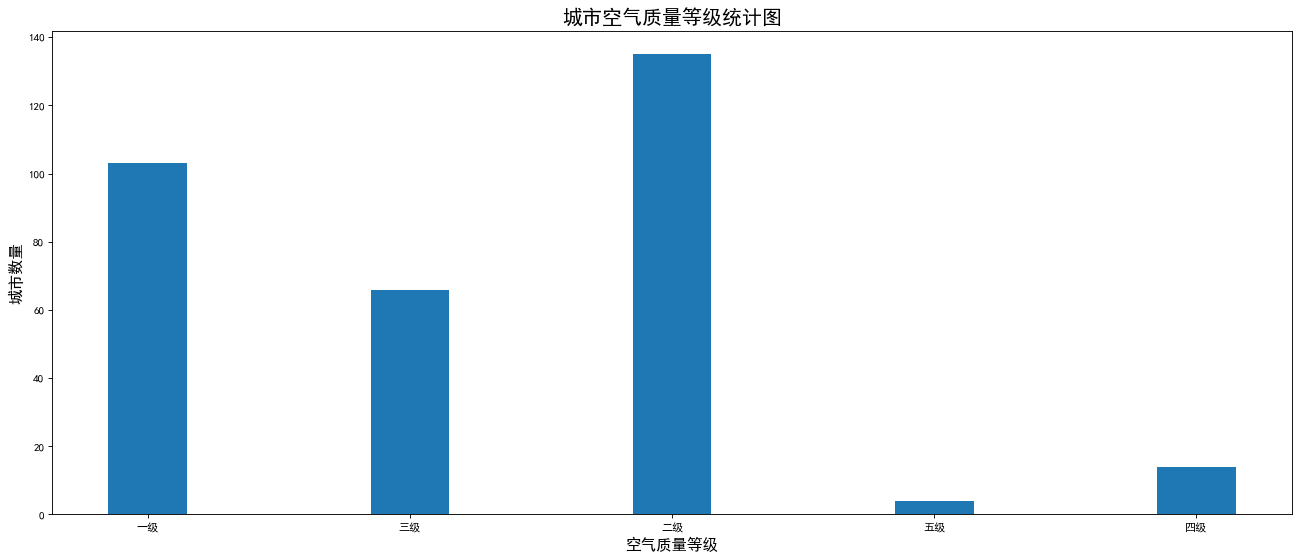

In [194]:
def level(q):
    if q <= 50:
        return '一级'
    elif q > 50 and q <= 100:
        return '二级'
    elif q > 100 and q <= 150:
        return '三级'
    elif q > 150 and q <= 200:
        return '四级' 
    elif q > 200 and q <= 300:
        return '五级'  
    elif q > 300:
        return '六级' 
df_data['空气质量等级'] = df_data['空气质量指数'].apply(level)
count_AQI = df_data['空气质量等级'].value_counts().sort_index()
plt.figure(figsize=(20,8),dpi=80)
plt.title('城市空气质量等级统计图',fontsize=18)
plt.xlabel('空气质量等级',fontsize=14)
plt.ylabel('城市数量',fontsize=14)
plt.bar(count_AQI.index,count_AQI.values,width=0.3)
plt.show()

小结：我国绝大部分城市空气质量等级为良好和优（一级和二级），少部分轻度污染（三级），极少部分中度以上污染（四级及以上）；

3.分析空气质量高低有可能由什么原因造成

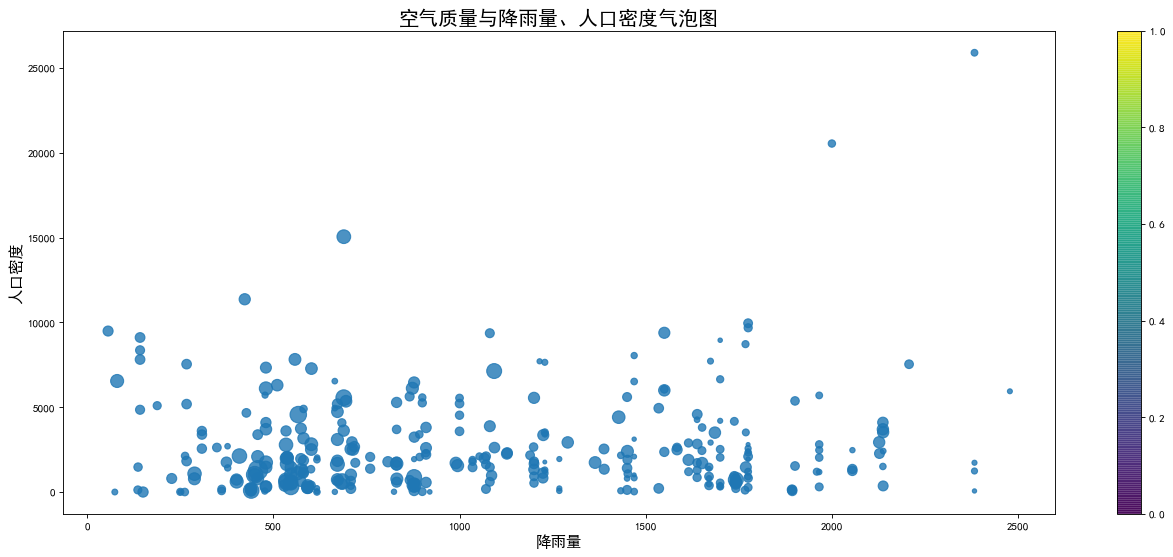

In [195]:
plt.figure(figsize=(20,8),dpi=80)
plt.title('空气质量与降雨量、人口密度气泡图',fontsize=18)
plt.xlabel('降雨量',fontsize=14)
plt.ylabel('人口密度',fontsize=14)
bubble =plt.scatter(df_data['降雨量'],df_data['人口密度'], cmap='PuBu_r',s= df_data['空气质量指数'], alpha =0.8)
plt.colorbar(bubble)
plt.show()

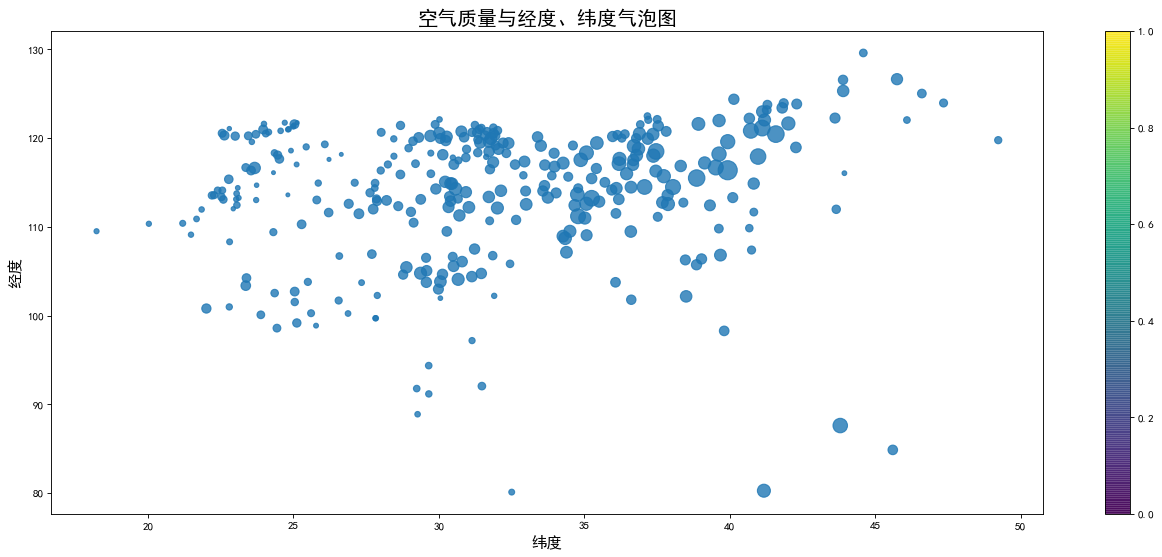

In [196]:
plt.figure(figsize=(20,8),dpi=80)
plt.title('空气质量与经度、纬度气泡图',fontsize=18)
plt.xlabel('纬度',fontsize=14)
plt.ylabel('经度',fontsize=14)
bubble =plt.scatter(df_data['纬度'],df_data['经度'], cmap='PuBu_r',s= df_data['空气质量指数'], alpha =0.8)
plt.colorbar(bubble)
plt.show()

小结：a.可以看出降雨量对空气质量有一定影响，降雨量越高，空气质量指数值较小，空气质量相对较好；b.从经度可看出西部空气质量较东部及中部要好，低纬度地区空气质量较高纬度地区要好，也佐证了降雨量对空气质量的影响；

4.判断抽样样本空气质量指数均值能否代表全国城市均值

使用假设检验——t检验验证全国空气质量均值

In [202]:
#进行单样本t检验，假设全国所有城市空气质量指数均值为70
from scipy import stats
check = stats.ttest_1samp(df_data['空气质量指数'],70)
print('t值为:',check.statistic)
print('p值为:',check.pvalue)

t值为: 2.2298053920236636
p值为: 0.026451669212978902


In [203]:
#计算全国空气质量指数的置信区间
l = len(df_data)
left = stats.t.ppf(0.025,df = l-1)
right = stats.t.ppf(0.975,df = l-1)
mean = df_data['空气质量指数'].mean()
std = df_data['空气质量指数'].std()
print(mean + left*(std / np.sqrt(l)),mean + right*(std / np.sqrt(l)))

70.62974608185895 80.07211727217832


小结：a.假设检验P值小于0.05，故可以拒绝均值为70的原假设；b.全国所有城市空气质量指数的置信区间为70.6~80.0之间，置信度为95%，样本均值为75.35，落在置信区间内，还是比较有代表性的均值；

5.分析沿海城市空气质量是否高于内陆，加以检验

沿海地区空气质量均值：64.0625
非沿海地区空气质量均值：79.08264462809917
沿海地区空气质量标准差：44.862663694323814
非沿海地区空气质量标准差：41.69221874342673


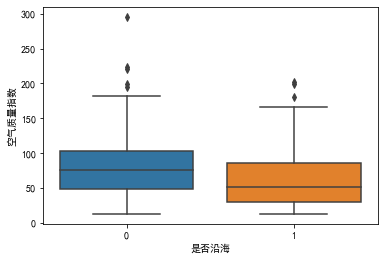

In [278]:
#绘制箱型图
df_data_Coastal0 = df_data[df_data['是否沿海'] == 0][['空气质量指数']]
df_data_Coastal1 = df_data[df_data['是否沿海'] == 1][['空气质量指数']]
mean0 = df_data_Coastal0.mean()
mean1 = df_data_Coastal1.mean()
std0 = np.std(df_data_Coastal0)
std1 = np.std(df_data_Coastal1)
print('沿海地区空气质量均值：{}\n非沿海地区空气质量均值：{}'.format(mean1.values[0],mean0.values[0]))
print('沿海地区空气质量标准差：{}\n非沿海地区空气质量标准差：{}'.format(std1.values[0],std0.values[0]))
sns.boxplot(x=df_data['是否沿海'],y=df_data['空气质量指数'])
plt.show()

In [279]:
#由于沿海地区标准差较大，需做频数分析或T检验再次检验结果
#检验两样本数据是否有方差齐性
print(stats.levene(df_data_Coastal0.values.T[0],df_data_Coastal1.values.T[0]))
stats.ttest_ind(df_data_Coastal0,df_data_Coastal1,equal_var=True)   #如果无方差齐性要改False，因为上条公式p值远大于0.05，所以有方差齐性

LeveneResult(statistic=0.07213748237795037, pvalue=0.7884227260955569)


Ttest_indResult(statistic=array([2.73172274]), pvalue=array([0.00665006]))

结论：a.从空气质量指数均值可看出沿海地区比非沿海地区要好，但数据不够集中稳定；b.通过t检验后p值为0.006远小于0.05，可以认为有超过99%的概率沿海地区空气质量比非沿海地区要好；

数据预测

确定相关系数，用已有的数据预测新城市空气质量指数

In [30]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split 

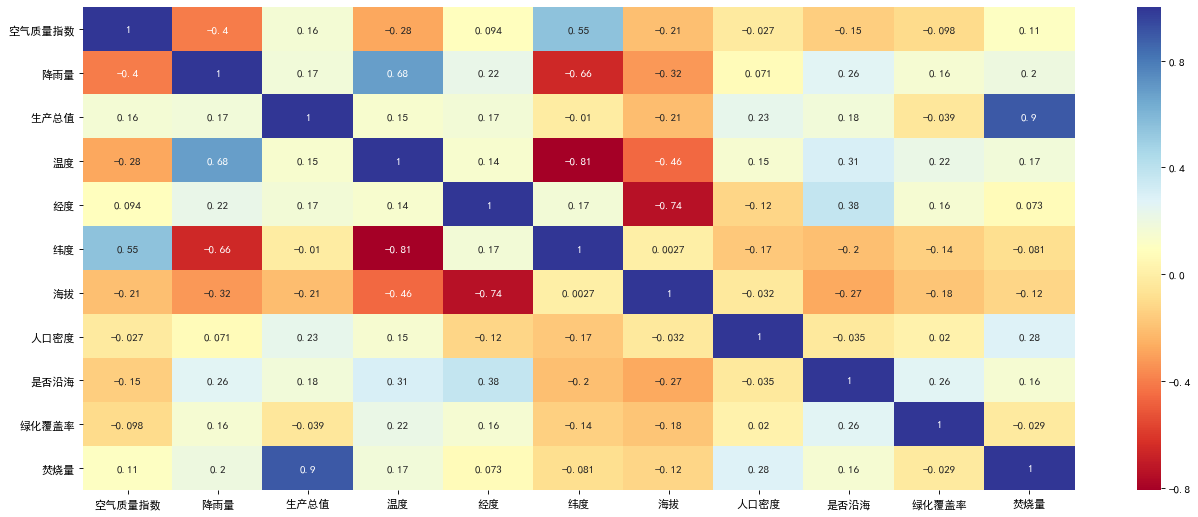

In [26]:
#查看各维度间的相关系数，用热图显示
plt.figure(figsize=(20,8),dpi=80)
sns.heatmap(df_data.corr(),cmap=plt.cm.RdYlBu,annot=True)
plt.show()

In [86]:
#按20%的比例划分训练集与预测集，以纬度和降雨量作为自变量，空气质量指数为因变量建立多远回归模型
X_train, X_test, y_train, y_test= train_test_split(df_data[['纬度','降雨量']], df_data['空气质量指数'], test_size=0.2, random_state=0)

In [87]:
clf =linear_model.LinearRegression()
clf.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.27230948772994346
0.46016530129395217


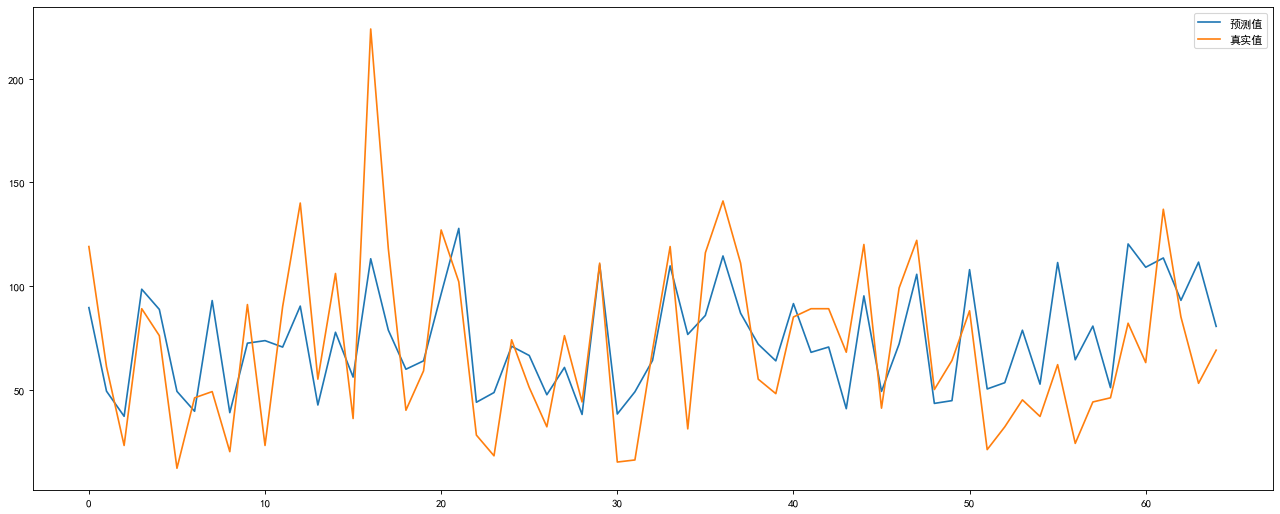

In [89]:
plt.figure(figsize=(20,8),dpi=80)   
plt.plot(clf.predict(X_test),label='预测值')     
plt.plot(y_test.values,label='真实值') 
plt.legend()
plt.show()